In [1]:
import numpy as np
import cv2

im = cv2.imread('test_plate.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [2]:
rects = [cv2.boundingRect(ctr) for ctr in contours]

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

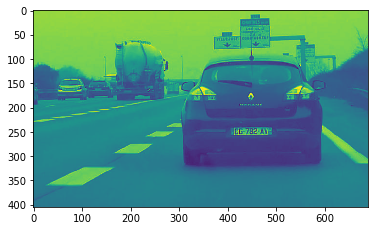

In [5]:
plt.imshow(imgray)

In [6]:
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np

In [7]:
clf = joblib.load("digits_cls.pkl")

In [8]:
rect = rects[10]

In [9]:
def a(rect):
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = thresh[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

In [10]:
for rect in rects:
    # Draw the rectangles
    try:
        a(rect)
    except:
        pass
cv2.imshow("Resulting Image with Rectangular ROIs", im)
cv2.waitKey()

/Users/az02210/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


113